# Load data and Set Up

In [1]:
pip install emoji

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install regex

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install emosent-py

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Load and clean data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from textblob import TextBlob
import glob
import matplotlib.colors as mcolors
import re
import codecs
import functools
import operator
import emoji
import regex
from collections import Counter

In [5]:
# read data
tweets_data= pd.read_table(
    '/Users/chensong/UW/SecondYear/InfoSeeking_Lab/tweets_1000.csv', 
    names = ['texts'],
#     encoding='utf-8'
)

In [6]:
tweets_data['texts'] = tweets_data['texts'].apply(lambda x: codecs.escape_decode(x)[0].decode('utf-8'))

In [7]:
tweets_data.head(10)

,texts
0,😑😑😫 y’all suck at social distancing.
1,Jasmine Strange shares a message of hope durin...
2,I gotta fight these allergies in public to mak...
3,https://t.co/57NBQ2XQsG On Easter please reme...
4,@lenibriscoe I have a cute one made from recyc...
5,Told my Mom we should start to work from home ...
6,💔💔💔🙏🏽🙏🏽🙏🏽
7,@tracyhutchsgt @dani_cro1 @catmomus @LedionShk...
8,We are all in deep doo doo 🍸
9,"To be honest, everyone was scared of #coronavi..."


### Split emojis and texts

In [8]:
# Define a function that split emojis funtiondef split_count(text):
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

In [9]:
full_list = []

In [10]:
# add emojis in each tweet into a new list
for i in range(len(tweets_data.index)):
    full_list.append(split_count(tweets_data.iloc[i]['texts']))


#### Clean the new dataframe with emojis

In [11]:
tweets_data['emoji'] = full_list
tweets_data['emojis'] = [','.join(map(str, l)) for l in tweets_data['emoji']]
df_tweets = tweets_data.drop(columns=['emoji'])

In [12]:
df_tweets.head(10)

,texts,emojis
0,😑😑😫 y’all suck at social distancing.,"😑,😑,😫"
1,Jasmine Strange shares a message of hope durin...,
2,I gotta fight these allergies in public to mak...,"💀,🙈"
3,https://t.co/57NBQ2XQsG On Easter please reme...,
4,@lenibriscoe I have a cute one made from recyc...,
5,Told my Mom we should start to work from home ...,
6,💔💔💔🙏🏽🙏🏽🙏🏽,"💔,💔,💔,🙏🏽,🙏🏽,🙏🏽"
7,@tracyhutchsgt @dani_cro1 @catmomus @LedionShk...,
8,We are all in deep doo doo 🍸,🍸
9,"To be honest, everyone was scared of #coronavi...",


# In-depth Analysis

### Tidy the text data

In [13]:
from nltk.corpus import stopwords

In [14]:
# Convert to lower case
df_tweets = df_tweets.apply(lambda x: x.astype(str).str.lower())
# Romove punctuation
df_tweets = df_tweets.apply(lambda x: x.astype(str).str.replace('[^\w\s]',' '))
# split the sentence to words
df_tokens = df_tweets.apply(lambda x : x.astype(str).str.split())
# Romove stopwords
stop_words = stopwords.words('english')
df_token_tidy = pd.DataFrame(df_tokens['texts'].apply(lambda x: [item for item in x if item not in stop_words]))

In [15]:
df_token_tidy.head()

,texts
0,"[suck, social, distancing]"
1,"[jasmine, strange, shares, message, hope, life..."
2,"[gotta, fight, allergies, public, make, sure, ..."
3,"[https, co, 57nbq2xqsg, easter, please, rememb..."
4,"[lenibriscoe, cute, one, made, recycled, sari,..."


### Word Cloud

In [16]:
from wordcloud import WordCloud

In [17]:
# make a word cloud list
cloud_list = []
for index, row in df_token_tidy.iterrows():
    for word in row[0]:
        cloud_list.append(word)
# join every word in the list
comment = " ".join(w for w in cloud_list)

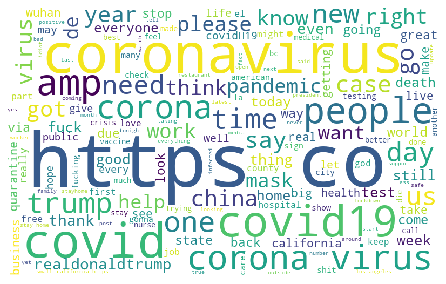

In [18]:
# create a word cloud
wordcloud_comment = WordCloud(width = 800, height = 500, 
                background_color ='white',  
                min_font_size = 10).generate(comment) 
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud_comment) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Findings from wordcloud

    From the word cloud, we can see that people are mostly talking about COVID-19 on tweets. We can also see that people show concerns and worries from words such as "death", "please", "help", and "fuck" etc. In addition, people are talking about politics based on the pandemic, we can see some political-related words, like "china", "trump", and "califonia" etc,; Words like "mask", "test" show that people are talking about the current regulations during the pandemic.
    Word cloud provides us a overview of what people are talking about on tweets and what are the popular topics, but since wordcloud only shows limited word and we can only tell by subjectivity of ourselves, we need more in-depth analysis to understand the meaning behind the scene.

### Lemmatize the data

In [19]:
from nltk.stem import WordNetLemmatizer 

In [20]:
df_tweets_tidy = df_token_tidy['texts'].apply(lambda x: " ".join (word for word in x))
df_tweets_tidy.head()

0                               suck social distancing
1    jasmine strange shares message hope life covid...
2    gotta fight allergies public make sure people ...
3    https co 57nbq2xqsg easter please remember poo...
4    lenibriscoe cute one made recycled sari silk f...
Name: texts, dtype: object

In [21]:
lemmatizer = WordNetLemmatizer() 
df_tweets_tidy_lemmatizer = df_tweets_tidy.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

### Tokenize data using unigrams

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:

vectorizer = CountVectorizer()
vectorizer.fit(df_tweets_tidy_lemmatizer)
counts_tweets = vectorizer.transform(df_tweets_tidy_lemmatizer)
counts_tweets = counts_tweets.toarray()
counts_tweets.shape

(971, 4860)

In [24]:
counts_tweets = pd.DataFrame(counts_tweets, columns = vectorizer.get_feature_names())

In [25]:
counts_tweets.shape

(971, 4860)

### Combine emojis with lemmatized text

In [26]:
# reformat the dataframe orignal data frames to combine
df_tweets_tidy_lemmatizer = pd.DataFrame(df_tweets_tidy_lemmatizer)
tidy_tweets_with_emojis = pd.concat([df_tweets_tidy_lemmatizer, tweets_data], axis = 1, sort = False)
tidy_tweets_with_emojis.columns = ['tidy_texts', 'full texts','emoji','emojis']
tweets_with_emojis = tidy_tweets_with_emojis.drop(tidy_tweets_with_emojis.columns[[1, 2]], axis=1)

In [27]:
# check format
tweets_with_emojis.head()

,tidy_texts,emojis
0,suck social distancing,"😑,😑,😫"
1,jasmine strange share message hope life covid1...,
2,gotta fight allergy public make sure people th...,"💀,🙈"
3,http co 57nbq2xqsg easter please remember poor...,
4,lenibriscoe cute one made recycled sari silk f...,


In [28]:
# Combine two columns
tweets_with_emojis["full_message"] = tweets_with_emojis["tidy_texts"] + tweets_with_emojis["emojis"]

In [29]:
tweets_with_emojis.head(7)

,tidy_texts,emojis,full_message
0,suck social distancing,"😑,😑,😫","suck social distancing😑,😑,😫"
1,jasmine strange share message hope life covid1...,,jasmine strange share message hope life covid1...
2,gotta fight allergy public make sure people th...,"💀,🙈",gotta fight allergy public make sure people th...
3,http co 57nbq2xqsg easter please remember poor...,,http co 57nbq2xqsg easter please remember poor...
4,lenibriscoe cute one made recycled sari silk f...,,lenibriscoe cute one made recycled sari silk f...
5,told mom start work home due corona one else w...,,told mom start work home due corona one else w...
6,,"💔,💔,💔,🙏🏽,🙏🏽,🙏🏽","💔,💔,💔,🙏🏽,🙏🏽,🙏🏽"


In [30]:
tweets = tweets_with_emojis['full_message']
df_full_tidy_tweets = pd.DataFrame(tweets)
df_full_tidy_tweets.head()

,full_message
0,"suck social distancing😑,😑,😫"
1,jasmine strange share message hope life covid1...
2,gotta fight allergy public make sure people th...
3,http co 57nbq2xqsg easter please remember poor...
4,lenibriscoe cute one made recycled sari silk f...


## Sentiment Analysis on text and emoji

### Sentiment Analysis on texts

### TextBlob

In [31]:
def sentimentscore(x):
    return TextBlob(x).sentiment   
# sentiment score on tweets data
df_tweets_sentiment = pd.DataFrame([sentimentscore(x) for x in tweets])


df_tweets_sentiment.head()

#### Explore the results

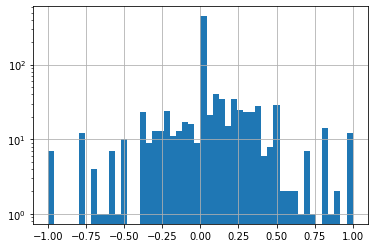

In [32]:
df_tweets_sentiment['polarity'].hist(log=True, bins=50)

In [33]:
(df_tweets_sentiment['polarity'] > 0).value_counts()

False    619
True     352
Name: polarity, dtype: int64

Text(0.5, 1.0, 'negative subjectivity')

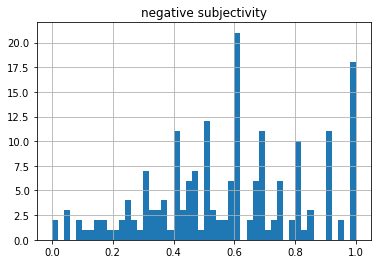

In [34]:
df_tweets_sentiment[df_tweets_sentiment['polarity'] < 0]['subjectivity']\
    .hist(bins=50)
plt.title('negative subjectivity')

Text(0.5, 1.0, 'positive subjectivity')

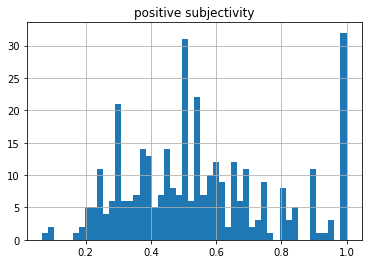

In [35]:
df_tweets_sentiment[df_tweets_sentiment['polarity'] > 0]['subjectivity']\
    .hist(bins=50)
plt.title('positive subjectivity')

In [36]:
tweets_data_with_sentiment = pd.concat([tweets, df_tweets_sentiment], 
                          axis=1, sort=False)

In [37]:
tweets_data_with_sentiment.head()

,full_message,polarity,subjectivity
0,"suck social distancing😑,😑,😫",0.033333,0.066667
1,jasmine strange share message hope life covid1...,-0.050000,0.150000
2,gotta fight allergy public make sure people th...,0.250000,0.477778
3,http co 57nbq2xqsg easter please remember poor...,-0.400000,0.600000
4,lenibriscoe cute one made recycled sari silk f...,0.500000,1.000000


### NLTK

In [38]:
import nltk

In [39]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
df_tweets_sentiment_NLTK = pd.DataFrame([sid.polarity_scores(x) for x in tweets])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chensong/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [40]:
df_tweets_sentiment_NLTK.head()

,neg,neu,pos,compound
0,0.592,0.408,0.000,-0.4404
1,0.074,0.615,0.311,0.7003
2,0.202,0.620,0.178,-0.0772
3,0.168,0.543,0.288,0.2960
4,0.000,0.563,0.437,0.7351


#### Explore the results

In [41]:
(df_tweets_sentiment_NLTK['compound'] > 0).value_counts()

False    600
True     371
Name: compound, dtype: int64

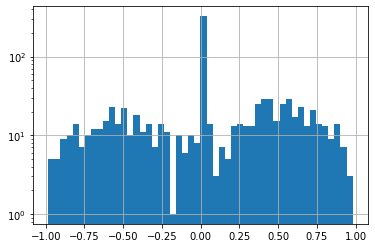

In [42]:
df_tweets_sentiment_NLTK['compound'].hist(bins=50, log=True)

### Findings from sentiment analysis on texts using TextBlob and NLTK

    Compare the results from NLTK and TextBlob, we can see that they are pretty similar to the TextBlob. Both of them show that there are more nagetive tweets than positive.From the result, we can also see that most negative tweets are subjective. Positive subjectivity is more denser in low subjectivity area than positive subjectivity, this could mean people show more positive comments because they are talking about some facts instead of feelings. But the numbers of total subjectivity(when subjectivity = 1) are relatively large in both analysis.

### TF-IDF Analysis

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
# Add feature TF-IDF
tfidfvec = TfidfVectorizer()
tfidf_tweets = tfidfvec.fit_transform(df_tweets_tidy_lemmatizer.values.squeeze())
# convert to a dataframe
df_tfidf_tweets = pd.DataFrame(tfidf_tweets.toarray(), columns = tfidfvec.get_feature_names())

In [45]:
df_tfidf_tweets.head()

,00,000,000th,01,03,04,05,0is3qxl4ps,0lgycdf5yc,0lzhuzyepb,...,下滑幅度更大,中に日本のクラブシーンを保存するために署名します,以上,則降了75,加州機場出發的航班整體下降65,洛杉磯國際機場,班機減少了80,疫情爆發以來,而橙縣約翰韋恩機場,自三月份新冠肺炎
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### top 30 words used in tweets data

In [46]:
feature_array = np.array(tfidfvec.get_feature_names())
tfidf_sorting = np.argsort(tfidf_tweets.toarray()).flatten()[::-1]

n = 30
top_n = feature_array[tfidf_sorting][:n]

In [77]:
print(top_n)

['4ev3ujq53d' '97' 'top' 'sars' 'kill' 'cnn' 'toll' 'wuhan' 'death' 'day'
 'one' 'people' 'coronavirus' 'http' 'co' 'fee' 'federal' 'feed' 'feeding'
 'feel' 'feedthefrontline' 'feeling' 'fell' 'fellow' 'fema' 'fed'
 '自三月份新冠肺炎' 'featuring' 'fear' 'far']


### Findings from TF-IDF Analysis

    From the outputs of the top 30 words used in the tweets data, we know that people are talking about Coronavius, talking about the death cause by the virus, comparing SARS with CORONAVIRUS, and talking about the new reporters .
    We also find that there are chinese characters in the tweets data. If we dig a litter deeper, we can find there are chineses characters and japanese characters in the tweets data, one way to deal with these foreign characters is using language detection and tokenize them by thier own rules.

### Bigram Features

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
# Getting bigrams
vectorizer_bi_tweets = CountVectorizer(ngram_range =(2, 2)) 
X1 = vectorizer_bi_tweets.fit_transform(tweets)  
features = (vectorizer_bi_tweets.get_feature_names()) 
bi_tweets = pd.DataFrame(X1.toarray(), columns = features)
# check dimensions
bi_tweets.shape

(971, 9919)

### Topic Model Weights Analysis

In [50]:
import gensim
from gensim import corpora

In [51]:
# data prepare for topic model
token_lemm = pd.DataFrame(df_full_tidy_tweets.apply(lambda x: [item.split(" ") for item in x]))
token_list = []
t = token_lemm.apply(lambda x: [token_list.append(word)for word in x])
token_list = token_lemm['full_message'].to_list()

In [52]:
# Create Dictionary
dictionary = corpora.Dictionary(token_list)
# Create Corpus
texts = token_lemm
# Term Document Frequency
corpus = [dictionary.doc2bow(text) for text in token_list]

In [53]:
# get a overview of topic
np.random.seed(123)
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 9, id2word=dictionary, passes=15)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=12)
for topic in topics:
    print(topic)

(0, '0.017*"co" + 0.017*"http" + 0.013*"corona" + 0.012*"covid" + 0.011*"people" + 0.009*"virus" + 0.007*"know" + 0.006*"19" + 0.006*"go" + 0.005*"like" + 0.005*"fuck" + 0.004*"case"')
(1, '0.038*"http" + 0.038*"co" + 0.014*"coronavirus" + 0.014*"corona" + 0.011*"covid19" + 0.010*"virus" + 0.006*"trump" + 0.005*"people" + 0.004*"amp" + 0.004*"u" + 0.004*"via" + 0.003*"covid"')
(2, '0.035*"co" + 0.035*"http" + 0.017*"coronavirus" + 0.009*"corona" + 0.007*"time" + 0.005*"covid" + 0.005*"amp" + 0.005*"virus" + 0.005*"get" + 0.004*"covid19" + 0.004*"new" + 0.004*"would"')
(3, '0.017*"http" + 0.017*"co" + 0.011*"coronavirus" + 0.011*"covid" + 0.009*"19" + 0.009*"get" + 0.007*"people" + 0.006*"say" + 0.006*"like" + 0.005*"home" + 0.004*"3" + 0.004*"u"')
(4, '0.013*"co" + 0.012*"http" + 0.011*"coronavirus" + 0.011*"covid" + 0.010*"corona" + 0.008*"covid19" + 0.006*"virus" + 0.005*"19" + 0.005*"day" + 0.005*"time" + 0.005*"need" + 0.004*"one"')
(5, '0.026*"http" + 0.026*"co" + 0.017*"coronavir

### Apply LDA on tweets data

In [54]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [55]:
# LDA on tweets data
lda = LDA(n_components = 9)
lda.fit(counts_tweets)
ldaOut_tweets = lda.transform(counts_tweets)
# convert to a data frame
df_lda_tweets = pd.DataFrame(ldaOut_tweets)
# check dimension of ldaOut 
df_lda_tweets.shape

(971, 9)

### Data Visualization

### pyLDAvis

In [56]:
import pyLDAvis.gensim

In [57]:

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary=ldamodel.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.076372 -0.100160       1        1  17.252684
5     -0.075178  0.105405       2        1  13.140503
0      0.032800 -0.084979       3        1  11.935395
8     -0.051077  0.012439       4        1  11.457970
2     -0.037319  0.031813       5        1  11.213773
3     -0.002030 -0.010382       6        1  10.464849
6      0.089446  0.040636       7        1   8.583090
4      0.015451 -0.007696       8        1   8.492729
7      0.104278  0.012924       9        1   7.459013, topic_info=            Term        Freq       Total Category  logprob  loglift
8           http  286.000000  286.000000  Default  30.0000  30.0000
3             co  286.000000  286.000000  Default  29.0000  29.0000
697           de   16.000000   16.000000  Default  28.0000  28.0000
238          amp   56.000000   56.000000  Default  27.0000  27.0000
4    coronavirus  135.000000  135.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
8           http    2.606051  286.284546   Topic9  -5.8549  -2.1034
3             co    2.604700  286.941925   Topic9  -5.8554  -2.1062
264        state    1.981320   14.016912   Topic9  -6.1289   0.6392
216        virus    1.981147   68.917366   Topic9  -6.1290  -0.9535
390         even    1.981122   16.830639   Topic9  -6.1290   0.4562

[691 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1034      3  0.933673     
2406      1  0.269793   00
2406      2  0.539585   00
66        1  0.289906  000
66        3  0.096635  000
...     ...       ...  ...
2393      5  0.472064  zoo
4926      1  0.890655    द
4928      1  0.890655    य
4929      1  0.890655    र
1164      6  0.475921    😳

[1351 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 1, 9, 3, 4, 7, 5, 8])

### Top 30 keywords for the 9 topics 

In [58]:
for idx, topic in ldamodel.show_topics(formatted=False, num_words= 30):
    print('Topic: {} \nWords: {}'.format(idx, '|'.join([w[0] for w in topic])))

Topic: 0 
Words: co|http|corona|covid|people|virus|know|19|go|like|fuck|case|get|make|right|day|coronavirus|covid19|got|one|yes|best|back|think|still|work|need|good|great|shit
Topic: 1 
Words: http|co|coronavirus|corona|covid19|virus|trump|people|amp|u|via|covid|think|2|travel|really|thing|hand|california|today|one|make|right|need|like|get|w|day|due|fact
Topic: 2 
Words: co|http|coronavirus|corona|time|covid|amp|virus|get|covid19|new|would|china|people|san|wow|say|realdonaldtrump|u|trump|case|via|el|de|look|week|19|way|pandemic|test
Topic: 3 
Words: http|co|coronavirus|covid|19|get|people|say|like|home|3|u|may|please|corona|stay|city|stop|covid19|getting|california|vaccine|mean|quarantine|good|real|look|china|got|one
Topic: 4 
Words: co|http|coronavirus|covid|corona|covid19|virus|19|day|time|need|one|got|year|help|trump|new|test|hospital|go|realdonaldtrump|good|would|stay|pandemic|going|business|still|like|listen
Topic: 5 
Words: http|co|coronavirus|covid|amp|19|u|covid19|corona|get|ca

### Findings from LDA Analysis

    Taking a closer look at the popular words in each topic, we can see that different topics have different main focuses, but some of them have overlapped focus, which we can also tell from the dynamic pyLDAvis plots. For example, topic 7 mainly focus on the lockdown policy and the cities that are experiencing lockdown because of covid-19, and topic 9 mainly focus on covid-19 itself and the impact of it. Clearly, topic 7 and topic 9 have different focuses, but they do have overlap.

### Wordcloud of Top 30 words in each topic

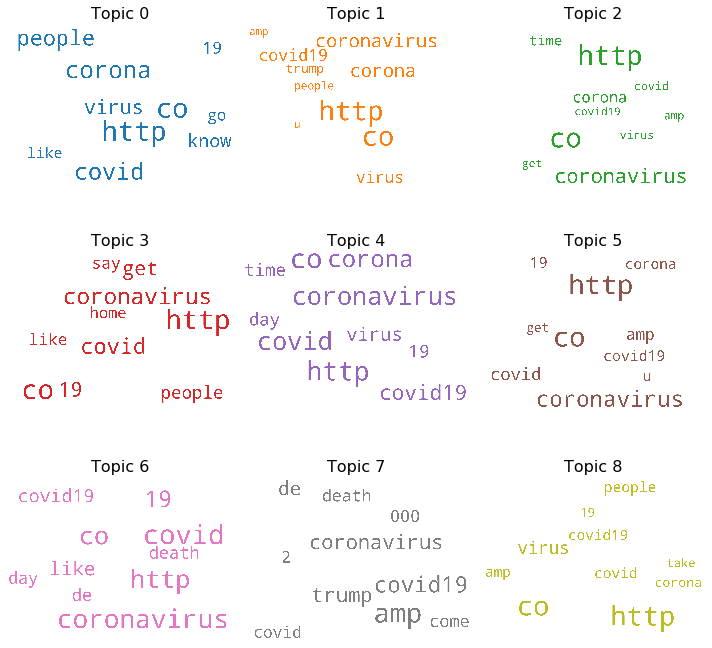

In [59]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] 
total_stopwords = stop_words
cloud = WordCloud(stopwords=total_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=30,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Sentiment Analysis on Emoji

In [60]:
df_tweets_emoji = pd.DataFrame(tweets_with_emojis['emojis'])
df_tweets_emoji.head()

,emojis
0,"😑,😑,😫"
1,
2,"💀,🙈"
3,
4,


In [61]:
# def extract_emojis(s):
#   return ''.join(c for c in s if c in emoji.UNICODE_EMOJI)

In [62]:
# combined_emoji_list = []
# for i in range(len(df_tweets_emoji.index)):
#     combined_emoji_list.append(extract_emojis(df_tweets_emoji.iloc[i]['emojis']))
# df_tweets_emoji['combined_emoji'] = combined_emoji_list

In [63]:
# df_tweets_emoji.head()

In [64]:
# define emoji sentiment score function
from emosent import get_emoji_sentiment_rank
def emoji_sentiment(text):
    return get_emoji_sentiment_rank(text)["sentiment_score"] if not pd.isna(text) else np.NaN

### Find the popolar emojis in different sentiment types

#### Add sentiment labels according to compoound

In [65]:
df_emojis_in_sentiment_type = pd.concat([df_tweets_sentiment_NLTK, df_tweets_emoji], axis = 1)

In [66]:
df_emojis_in_sentiment_type.head()

,neg,neu,pos,compound,emojis
0,0.592,0.408,0.000,-0.4404,"😑,😑,😫"
1,0.074,0.615,0.311,0.7003,
2,0.202,0.620,0.178,-0.0772,"💀,🙈"
3,0.168,0.543,0.288,0.2960,
4,0.000,0.563,0.437,0.7351,


In [67]:
# add sentiment labels according to the score of compound
sentiment_label_list = []
for i in range(len(df_emojis_in_sentiment_type.index)):
    if df_emojis_in_sentiment_type.iloc[i]['compound'] == 0.0 or df_emojis_in_sentiment_type.iloc[i]['compound'] == -0.0 : 
        sentiment_label_list.append('neural')
    elif df_emojis_in_sentiment_type.iloc[i]['compound'] < 0.0:
        sentiment_label_list.append('negative')
    else:
        sentiment_label_list.append('positive')

In [68]:
df_emojis_in_sentiment_type['sentiment_labels'] = sentiment_label_list
df_emojis_in_sentiment_type.head()

,neg,neu,pos,compound,emojis,sentiment_labels
0,0.592,0.408,0.000,-0.4404,"😑,😑,😫",negative
1,0.074,0.615,0.311,0.7003,,positive
2,0.202,0.620,0.178,-0.0772,"💀,🙈",negative
3,0.168,0.543,0.288,0.2960,,positive
4,0.000,0.563,0.437,0.7351,,positive


#### Group by each sentiment label and add to an dictionary

In [69]:
# sentiment_labels_dict
sentiment_labels_dict = df_emojis_in_sentiment_type.groupby('sentiment_labels')['emojis'].apply(list).to_dict()

In [70]:
# Remove empty strings
positive_list = list(filter(None, sentiment_labels_dict.get("positive")))
negative_list = list(filter(None, sentiment_labels_dict.get("negative")))
neural_list = list(filter(None, sentiment_labels_dict.get("neural")))
sentiment_labels_dict['positive'] = positive_list
sentiment_labels_dict['negative'] = negative_list
sentiment_labels_dict['neural'] = neural_list

In [71]:
sentiment_labels_dict

{'negative': ['😑,😑,😫',
  '💀,🙈',
  '❤️,❤️,❤️,❤️,❤️,❤️,❤️,❤️,❤️,❤️,❤️,❤️,❤️',
  '😡,😡',
  '‼️,🗣,‼️',
  '😭,😭,😭,😭,😭,😭,😭',
  '🤬,🤬,🤬,🤯',
  '🥴',
  '🦠,🤔,🤔,🤔,🤔,🤔,🤔,🤔',
  '🥴,🥴,🥴',
  '✌🏼,❤️,🇺🇸',
  '🥺',
  '👇🏼',
  '🧐',
  '🙄',
  '😥',
  '🧐,🧐,🧐,🧐',
  '👁,🌎,👁',
  '🤔',
  '😟,😷',
  '💯',
  '😮,🦠',
  '🤬,🤯,📛,🆘,📛,🛑,📛,🆘,🛑,📛,🆘,📛,🛑',
  '😤',
  '😩,😷',
  '🗽,👀,😳',
  '🤔',
  '😳',
  '🤪,😛,😜,🤢',
  '😂,😂',
  '❤️,🇺🇸,🇲🇽',
  '😑',
  '🥔,🥔,🥔,🥔',
  '🛑,🛑,🙏,🇺🇸,✔,⚖',
  '😒',
  '🤷\u200d♂️',
  '👍🏽,👌🏽,😁',
  '🥴',
  '😩',
  '🙃,🚨,😂,🙄,👀,👀,👏,👏,😎'],
 'neural': ['💔,💔,💔,🙏🏽,🙏🏽,🙏🏽',
  '🍸',
  '🐾',
  '📢,📌,❓,❗',
  '🥺,🤯',
  '😐',
  '🍺,😷',
  '❗️',
  '😢',
  '😷,🐝',
  '🍆,😍,💦',
  '👏🏼,👏🏼,👏🏼',
  '🙄,🤣,🤣',
  '🤣,🤣,🤣',
  '🤦🏽\u200d♂️',
  '🍻',
  '😍',
  '🤔',
  '🤔,🇺🇸,🙏,🇺🇸',
  '😳',
  '💀,💀,💀',
  '😳',
  '🤷🏻\u200d♂️,🤷🏻\u200d♂️',
  '👉',
  '🥺',
  '😳',
  '💀,💀,💀',
  '😂',
  '😢,😢,😢',
  '😂,😂,😂',
  '🥺',
  '😬',
  '🇺🇸',
  '😏,🤝',
  '🥺',
  '😽',
  '💀',
  '🧫',
  '🦠,😵',
  '🐾,🐾',
  '🇦🇨,🇦🇩,🇦🇪,🇦🇫,🇦🇬,🇦🇮,🇦🇱,🇦🇲,🇦🇴,🇦🇶,🇦🇷,🇦🇸,🇦🇹,🇦🇺,🇦🇼,🇦🇽,🇦🇿,🇧🇦,🇧🇧,🇧🇩,🇧🇪,🇧🇫,🇧🇬,🇧🇭,🇧🇮,🇧🇯,🇧🇱,🇧🇲,🇧🇳,🇧🇴,🇧🇶,🇧🇷,🇧🇸,🇧🇹,🇧🇼,🇧🇾,

#### Count occurance numbers of each emoji in each sentiment label

In [72]:
# key: emoji, value: occurance counts
count_pos = Counter(emoji for string in positive_list for emoji in string)
count_neg = Counter(emoji for string in negative_list for emoji in string)
count_neu = Counter(emoji for string in neural_list for emoji in string)
# remove the ',' in the dict
count_pos.pop(',', None)
count_neg.pop(',', None)
count_neu.pop(',', None)

228

In [73]:
# sort the dictionary by value(occurances of each emoji)
# sort count_pos
sorted_count_pos = {k: v for k, v in sorted(count_pos.items(), key=lambda item: item[1], reverse=True)}
# sort count_neg
sorted_count_neg = {k: v for k, v in sorted(count_neg.items(), key=lambda item: item[1], reverse=True)}
# sort count_neu
sorted_count_neu = {k: v for k, v in sorted(count_neu.items(), key=lambda item: item[1], reverse=True)}

#### Popular emojis in positive sentiment category

In [74]:
sorted_count_pos

{'🏻': 18,
 '🙏': 16,
 '🐯': 13,
 '️': 12,
 '🏼': 9,
 '😂': 6,
 '\u200d': 6,
 '🤞': 5,
 '❤': 5,
 '😭': 5,
 '👇': 5,
 '♂': 4,
 '🙄': 4,
 '💲': 3,
 '🙌': 3,
 '😡': 3,
 '🤥': 3,
 '😷': 3,
 '🤦': 3,
 '👌': 3,
 '👉': 2,
 '✨': 2,
 '🤷': 2,
 '🏾': 2,
 '🏽': 2,
 '⚕': 2,
 '🤧': 2,
 '🤢': 2,
 '😬': 2,
 '🦠': 2,
 '😒': 2,
 '🎶': 2,
 '✈': 1,
 '☁': 1,
 '🤣': 1,
 '🍊': 1,
 '😅': 1,
 '👨': 1,
 '🚑': 1,
 '🧑': 1,
 '✊': 1,
 '💯': 1,
 '💪': 1,
 '💕': 1,
 '🌻': 1,
 '🗽': 1,
 '🎻': 1,
 '🎸': 1,
 '🎺': 1,
 '🎷': 1,
 '🥁': 1,
 '🎤': 1,
 '😩': 1,
 '🌯': 1,
 '🚌': 1,
 '😢': 1,
 '⬇': 1,
 '🤗': 1,
 '🌝': 1,
 '🌟': 1,
 '📷': 1,
 '🍻': 1,
 '🤮': 1,
 '😳': 1,
 '😀': 1,
 '®': 1,
 '💖': 1,
 '☮': 1,
 '😐': 1,
 '💜': 1,
 '🍺': 1,
 '😟': 1,
 '➡': 1}

#### Popular emojis in negative sentiment category

In [75]:
sorted_count_neg

{'️': 18,
 '❤': 15,
 '🤔': 9,
 '😭': 7,
 '🥴': 5,
 '🧐': 5,
 '📛': 5,
 '🛑': 5,
 '🤬': 4,
 '🥔': 4,
 '😑': 3,
 '🇺': 3,
 '🇸': 3,
 '🆘': 3,
 '👀': 3,
 '😂': 3,
 '😡': 2,
 '‼': 2,
 '🤯': 2,
 '🦠': 2,
 '🏼': 2,
 '🙄': 2,
 '👁': 2,
 '😷': 2,
 '😩': 2,
 '😳': 2,
 '🏽': 2,
 '👏': 2,
 '😫': 1,
 '💀': 1,
 '🙈': 1,
 '🗣': 1,
 '✌': 1,
 '🥺': 1,
 '👇': 1,
 '😥': 1,
 '🌎': 1,
 '😟': 1,
 '💯': 1,
 '😮': 1,
 '😤': 1,
 '🗽': 1,
 '🤪': 1,
 '😛': 1,
 '😜': 1,
 '🤢': 1,
 '🇲': 1,
 '🇽': 1,
 '🙏': 1,
 '✔': 1,
 '⚖': 1,
 '😒': 1,
 '🤷': 1,
 '\u200d': 1,
 '♂': 1,
 '👍': 1,
 '👌': 1,
 '😁': 1,
 '🙃': 1,
 '🚨': 1,
 '😎': 1}

#### Popular emojis in neural sentiment category

In [76]:
sorted_count_neu

{'🇬': 25,
 '🇨': 23,
 '🇧': 22,
 '🇦': 21,
 '🇮': 17,
 '🇪': 16,
 '️': 15,
 '🇰': 15,
 '🔥': 14,
 '🏻': 12,
 '🇩': 11,
 '🇭': 11,
 '👏': 10,
 '🇫': 10,
 '🇲': 10,
 '🙏': 9,
 '🇷': 9,
 '👇': 9,
 '🇺': 8,
 '🇸': 8,
 '🏽': 7,
 '❗': 7,
 '💀': 7,
 '🇴': 7,
 '🇯': 7,
 '🤣': 6,
 '😳': 6,
 '😂': 6,
 '🇱': 6,
 '🇹': 6,
 '🇳': 6,
 '😱': 6,
 '😢': 5,
 '🇼': 5,
 '🇿': 5,
 '🥺': 4,
 '\u200d': 4,
 '♂': 4,
 '🤔': 4,
 '🇶': 4,
 '🇾': 4,
 '💞': 4,
 '💔': 3,
 '🐾': 3,
 '🏼': 3,
 '🇵': 3,
 '😉': 3,
 '🙌': 3,
 '😕': 3,
 '😷': 2,
 '😍': 2,
 '🙄': 2,
 '🤦': 2,
 '🤷': 2,
 '😏': 2,
 '🇽': 2,
 '🤪': 2,
 '‼': 2,
 '😔': 2,
 '😎': 2,
 '😭': 2,
 '♥': 2,
 '🍸': 1,
 '📢': 1,
 '📌': 1,
 '❓': 1,
 '🤯': 1,
 '😐': 1,
 '🍺': 1,
 '🐝': 1,
 '🍆': 1,
 '💦': 1,
 '🍻': 1,
 '👉': 1,
 '😬': 1,
 '🤝': 1,
 '😽': 1,
 '🧫': 1,
 '🦠': 1,
 '😵': 1,
 '🇻': 1,
 '🚨': 1,
 '\U0001f7e2': 1,
 '🔴': 1,
 '👀': 1,
 '🦇': 1,
 '🤧': 1,
 '😇': 1,
 '✨': 1,
 '🔮': 1,
 '🖕': 1,
 '🅰': 1,
 '😀': 1}

### Findings from sentiment analysis on emojis

    Personally, I think analyzing emojis are becoming more important nowadays because in the internet world, people increasingly love to use emojis to show their feelings and emotions. But from my own experience, I feel sometimes challenging to conduct sentiment analysis on emojis because people have different criteria/feelings on different emojis, and sometimes people like to use emojis in a vice versa way.
    From the tweets data, we can see that 🙏 ,🐯, 😂, 🤞, ❤, 🙄, 💲 occurs many times in positive sentiment category; ❤, 🤔, 😭, 🥴, 🤬, 😑 are very popular in negative sentiment category; some letter emojis, such as 🇬, 🇨, 🇧, 🇦, occurs the most in the neural sentiment category.
    From the results, we can see that in a very straight way that the category of emojis in the real world can approxiately reflectly how people react and use these emojis on tweets. 